In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

Importing the Data Set

In [55]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Preprocessing

In [56]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


import numpy as np
from google.colab import autoviz
df_6603966540663502635 = autoviz.get_df('df_6603966540663502635')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6603966540663502635, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6603966540663502635 = autoviz.get_df('df_6603966540663502635')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6603966540663502635, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6603966540663502635 = autoviz.get_df('df_6603966540663502635')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6603966540663502635, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6603966540663502635 = autoviz.get_df('df_6603966540663502635')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6603966540663502635, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6603966540663502635 = autoviz.get_df('df_6603966540663502635')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6603966540663502635, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6603966540663502635 = autoviz.get_df('df_6603966540663502635')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6603966540663502635, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6603966540663502635 = autoviz.get_df('df_6603966540663502635')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6603966540663502635, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6603966540663502635 = autoviz.get_df('df_6603966540663502635')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6603966540663502635, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6603966540663502635 = autoviz.get_df('df_6603966540663502635')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6603966540663502635, *[[['age', 'sex'], ['sex', 'cp'], ['cp', 'trestbps'], ['trestbps', 'chol']]], **{})
chart

In [57]:
df.shape

(303, 14)

## Checking the NULL Values.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [59]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


import numpy as np
from google.colab import autoviz
df_4762423641231905706 = autoviz.get_df('df_4762423641231905706')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4762423641231905706, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4762423641231905706 = autoviz.get_df('df_4762423641231905706')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4762423641231905706, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4762423641231905706 = autoviz.get_df('df_4762423641231905706')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4762423641231905706, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4762423641231905706 = autoviz.get_df('df_4762423641231905706')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4762423641231905706, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4762423641231905706 = autoviz.get_df('df_4762423641231905706')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4762423641231905706, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4762423641231905706 = autoviz.get_df('df_4762423641231905706')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4762423641231905706, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4762423641231905706 = autoviz.get_df('df_4762423641231905706')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4762423641231905706, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4762423641231905706 = autoviz.get_df('df_4762423641231905706')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4762423641231905706, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4762423641231905706 = autoviz.get_df('df_4762423641231905706')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4762423641231905706, *[[['age', 'sex'], ['sex', 'cp'], ['cp', 'trestbps'], ['trestbps', 'chol']]], **{})
chart

<Axes: >

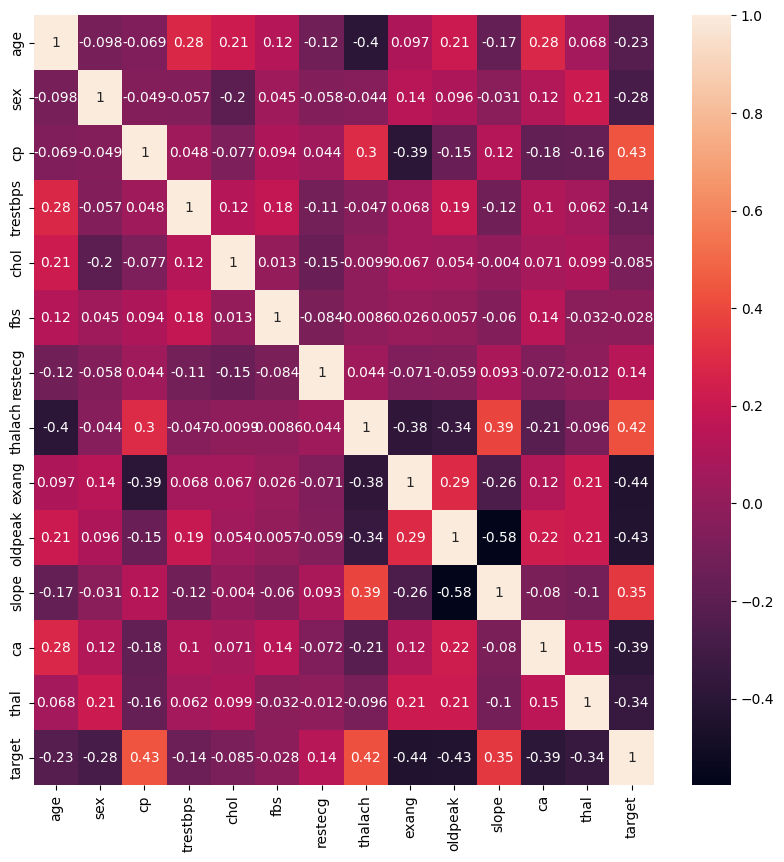

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)


In [61]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
df.isnull().sum().reset_index().rename(columns = ({'index':'Columns' , '0':'Total NULL Values'}))


,Columns,0
0,age,0
1,sex,0
2,cp,0
3,trestbps,0
4,chol,0
5,fbs,0
6,restecg,0
7,thalach,0
8,exang,0
9,oldpeak,0


In [63]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Here,

1 -> Person is having Defective Heart

0 -> Person is having healthy Heart

In [64]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4767219174009824741, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4767219174009824741, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4767219174009824741, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4767219174009824741, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4767219174009824741, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4767219174009824741, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4767219174009824741, *['cp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4767219174009824741, *['trestbps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4767219174009824741, *[[['age', 'sex'], ['sex', 'cp'], ['cp', 'trestbps'], ['trestbps', 'chol']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4767219174009824741, *['cp', 'age', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4767219174009824741, *['cp', 'sex', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4767219174009824741, *['cp', 'trestbps', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4767219174009824741 = autoviz.get_df('df_4767219174009824741')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4767219174009824741, *['cp', 'chol', None], **{})
chart

## Splitting the Data for training.

In [65]:
X = df.drop(columns = 'target' , axis = 1)
Y = df['target']

In [66]:
X.shape

(303, 13)

In [67]:
Y.shape


(303,)

In [68]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , stratify=Y, random_state = 2)


In [69]:
print('Training Data : ' , X_train.shape , Y_train.shape)
print('Testing Data : ' , X_test.shape , Y_test.shape)

Training Data :  (242, 13) (242,)
Testing Data :  (61, 13) (61,)


# Time to Train Our Model.
Here We will try to train our model using all possible

1.   Here We will try to train our model using all possible algorithms that comes under classificatino category and will try to figure it out that which algorithm gives us the best accuracy.
2.   Then after we will save that best trained model for deployment process.




## 1. Logistic Regression Algorithm.

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression(penalty='l2',       # L2 regularization (default)
    C=1.0,              # Regularization strength (default)
    solver='lbfgs',     # Optimization algorithm (default)
    max_iter=100,       # Maximum number of iterations (default)
    multi_class='auto', # Auto choose one-vs-rest or multinomial (default)
    class_weight=None,  # No class weights (default)
    random_state=42,    # Random seed for reproducibility
    fit_intercept=True, # Calculate the intercept (default)
    intercept_scaling=1 # No scaling of the intercept (default))
)

In [72]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [73]:
y_pred = model.predict(X_test)

In [74]:
accuracy = accuracy_score(Y_test, y_pred)



In [75]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy : 81.9672131147541
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



So here by using LogisticRegression Algorithm we got around 82% Accuracy.

# 2. Decision Tree Algorithm


In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
classifier = DecisionTreeClassifier(
    criterion='gini',          # Gini impurity (default)
    splitter='best',           # Choose the best split (default)
    max_depth=None,            # No maximum depth (default)
    min_samples_split=2,       # Minimum samples to split (default)
    min_samples_leaf=1,        # Minimum samples in a leaf (default)
    max_features=None,         # Consider all features (default)
    class_weight=None,         # No class weights (default)
    random_state=42            # Random seed for reproducibility)
)

In [78]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [81]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 78.68852459016394
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



Here , DecisionTreeClassifier Algorithm Trains well with our dataset and gives Around 78.68% Accuracy.

## 3. Random Forest Classifier Algorithm


In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
Random_forest_model = RandomForestClassifier(
    n_estimators=400,          # Number of trees in the forest
    criterion='gini',          # Gini impurity (default)
    max_depth=5,            # No maximum depth (default)
    min_samples_split=2,       # Minimum samples to split (default)
    min_samples_leaf=1,        # Minimum samples in a leaf (default)
    max_features='auto',       # Auto choose features to consider
    class_weight=None,         # No class weights (default)
    random_state=42            # Random seed for reproducibility
)

In [84]:
Random_forest_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=5, max_features='auto', n_estimators=400,
                       random_state=42)

In [85]:
y_pred = Random_forest_model.predict(X_test)

In [86]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [87]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 77.04918032786885
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Here , RandomForestClassifier Algorithm Trains well with our dataset and gives Around 80% Accuracy.

## Support Vector Machine(SVM) Algorithm


In [88]:
from sklearn.svm import SVC


In [89]:
SVM_model = SVC(
    kernel='rbf',            # Radial Basis Function (RBF) kernel (default)
    C=1.0,                   # Regularization parameter (default)
    gamma='scale',           # Kernel coefficient (default)
    class_weight=None,       # No class weights (default)
    random_state=42          # Random seed for reproducibility
)

In [90]:
SVM_model.fit(X_train, Y_train)

SVC(random_state=42)

In [91]:
y_pred = SVM_model.predict(X_test)



In [92]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [93]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 62.295081967213115
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.46      0.53        28
           1       0.62      0.76      0.68        33

    accuracy                           0.62        61
   macro avg       0.62      0.61      0.61        61
weighted avg       0.62      0.62      0.61        61



So here by using Support Vector Machine Algorithm we got around 62.3% Accuracy.

## Naive Bayes Algorithm

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
custom_priors = [0.7, 0.3]  # Let's assume class 0 has a prior probability of 0.7, and class 1 has a prior probability of 0.3

In [96]:
Guassian_model = GaussianNB(priors=custom_priors)

In [97]:
Guassian_model.fit(X_train, Y_train)

GaussianNB(priors=[0.7, 0.3])

In [98]:
y_pred = Guassian_model.predict(X_test)

In [99]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [100]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 80.32786885245902
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81        28
           1       0.92      0.70      0.79        33

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



So here by using Logistic Regression Algorithm we got around 82% Accuracy which is a bit similar to Naive Bayes Algorithm.

**Conclusion :** Logistic Regression Algorithm Trains well with our provided data. So here we are going to use Logistic Regression Algorithm as it is giving us around 82% Accuracy.



## Time to Save Our Decision Tree Model.

In [101]:
import pickle

In [102]:
with open('Heart_model.pkl', 'wb') as file:
    pickle.dump(model, file)